Wahlpflichtach Künstliche Intelligenz I: Praktikum

---

# 05 - Erste Visualisierungen in Matplotlib

- [Anatomie-eines-"Plots"](#Anatomie-eines-"Plots")
- [Grundlegendes Plotten](#Grundlegendes-Plotten)
- [Plotten von Funktionen](#Plotten-von-Funktionen)
- [Eingangsdaten: 2D-Arrays oder Bilder](#Eingangsdaten:-2D-Arrays-oder-Bilder)
- [Visualisierung statistischer Verteilungen](#Visualisierung-statistischer-Verteilungen)
- [Plots mit Anmerkungen versehen](#Plots-mit-Anmerkungen-versehen)
- [Wie man "Matplotlib" spricht](#Wie-man-"Matplotlib"-spricht)
- [Begrenzungen, Legenden und Layouts](#Begrenzungen,-Legenden-und-Layouts)
- [Plots speichern](#Plots-speichern)

### Kurzer Hinweis zu "Backends" und Jupyter-Notebooks
Matplotlib hat mehrere Backends. Die Backends erlauben es, Matlpotlib auf einer Vielzahl von Plattformen mit einer Vielzahl von GUI-Toolkits (GTK, Qt, Wx, etc.) zu verwenden, die alle so geschrieben sind, dass es Ihnen die meiste Zeit egal sein wird, welches Backend Sie verwenden. 

In [2]:
import matplotlib

print(matplotlib.__version__)
print(matplotlib.get_backend())

3.10.0
module://matplotlib_inline.backend_inline


Normalerweise müssten wir uns darüber nicht allzu viele Gedanken machen, aber IPython/Jupyter-Notebooks verhalten sich einen Hauch anders als "normales" Python. In JupyterLab-Notebooks wollen wir 
entweder das `inline`-Backend verwenden, um Zahlen statisch in das Notizbuch einzubetten oder das `widget`-Backend verwenden, um interaktive Zahlen zu erhalten. 


Wir können dies auf zwei Arten tun:

1. Der IPython ``%matplotlib backend_name`` "magic" Befehl (oder ``plt.ion()``, der sich ähnlich verhält)
   - Die Zahlen werden von IPython automatisch angezeigt, auch wenn Sie ``plt.show()`` nicht aufrufen.
     
2. ``matplotlib.use("backend_name")``
   - Die Zahlen werden nur angezeigt, wenn Sie ``plt.show()`` aufrufen.

Hier werden wir die erste Methode verwenden, da die interaktive Inline-Anzeige in jupyter lab noch nicht funktioniert (im reinen Notebook funktioniert sie einwandfrei). Wir verwenden aber trotzdem `plt.show()`, um zu demonstrieren, wie der Code in einem einfachen Python-Skript aussehen würde.

Mehr Informationen über Backends: https://matplotlib.org/3.2.1/tutorials/introductory/usage.html#backends

Lassen Sie uns für den Moment das `inline`-Backend verwenden.

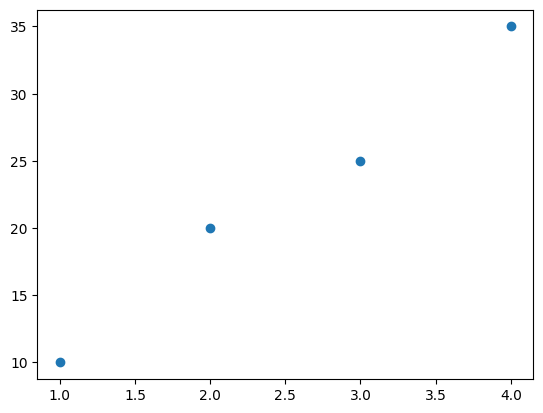

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter([1, 2, 3, 4], [10, 20, 25, 35])
plt.show()

Mehrere Aufrufe der Plot-Funktion führen zu mehreren Plots. Dies funktioniert mit vielen Funktionen in matplotlib (plot, scatter, bar, etc.) und weist den verschiedenen Aufrufen unterschiedliche Farben zu.

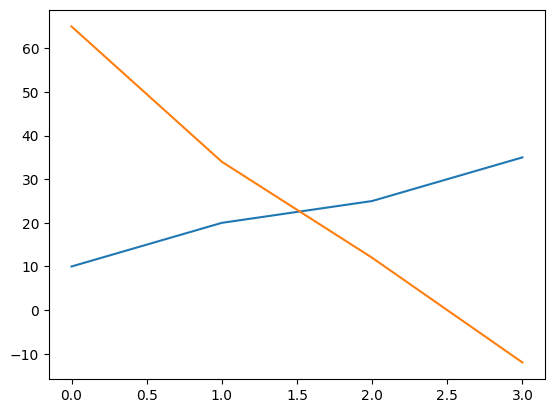

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([10, 20, 25, 35])
ax.plot([65, 34, 12, -12])
plt.show()

### Axes-Methoden (objektorientierte Schnittstelle) vs. pyplot (Zustandsmaschinen-Schnittstelle)

Interessanterweise existieren so gut wie alle Methoden eines `Axes`-Objekts als Funktion im `pyplot`-Modul (und umgekehrt). Wenn Sie zum Beispiel `plt.xlim(1, 10)` aufrufen, ruft `pyplot` `ax.set_xlim(1, 10)` auf, egal welche `Axes` gerade *aktuell* ist. Hier ist eine äquivalente Version des obigen Beispiels, die nur `pyplot` verwendet.

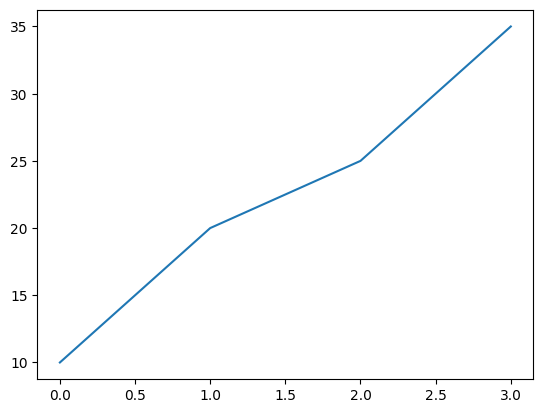

In [14]:
plt.figure()
plt.plot([10, 20, 25, 35])
plt.show()

Viel sauberer, und viel klarer! Also, warum werden die meisten dieser Beispiele nicht dem pyplot-Ansatz folgen? Weil [PEP20](http://www.python.org/dev/peps/pep-0020/) "The Zen of Python" sagt:

"Explicit is better than implicit"

Während sehr einfache Plots mit kurzen Skripten von der Prägnanz des impliziten pyplot-Ansatzes profitieren, werden Sie bei komplizierteren Plots oder bei der Arbeit innerhalb größerer Skripte das *Axes*- und/oder *Figure*-Objekt explizit übergeben wollen, um darauf zu operieren.

Der Vorteil, die Achsen, mit denen wir arbeiten, in unserem Code klar festzuhalten, wird deutlicher, wenn wir anfangen, mehrere Achsen in einer Figur zu haben.

### Mehrere Achsen

Wir haben bereits erwähnt, dass eine Figur mehr als eine `Achse` haben kann.  Wenn Sie möchten, dass Ihre Achsen auf einem regelmäßigen Rastersystem liegen, dann ist es am einfachsten, `plt.subplots(...)` zu verwenden, um eine Figur zu erstellen und die Achsen automatisch hinzuzufügen.

Zum Beispiel:

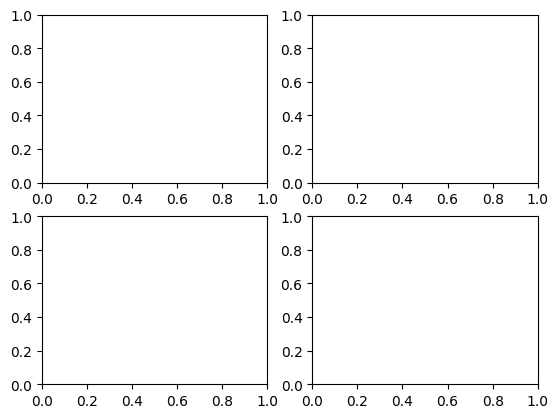

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.show()

`plt.subplots(...)` erstellt eine neue Figur und fügt ihr 4 Subplots hinzu.  Das zurückgegebene "Achsen"-Objekt ist ein 2D-Numpy-Objekt-Array.  Jedes Element in dem Array ist eine der Teilflächen.  Sie sind so angeordnet, wie Sie sie in der Abbildung sehen.  

Wenn wir also mit einer dieser Achsen arbeiten wollen, können wir das Array "axes" indizieren und die Methoden dieses Elements verwenden.

Zum Beispiel:

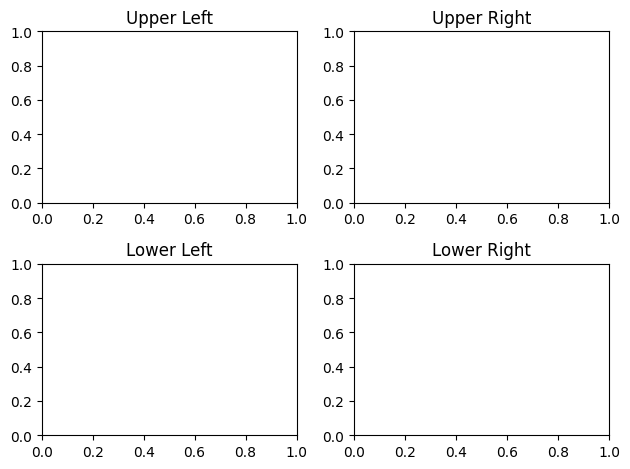

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].set(title="Upper Left")
axes[0, 1].set(title="Upper Right")
axes[1, 0].set(title="Lower Left")
axes[1, 1].set(title="Lower Right")

# tight_layout makes sure titles and tick labels do not overlap.
fig.tight_layout()

plt.show()

Eine wirklich nette Sache an `plt.subplots()` ist, dass es, wenn es ohne Argumente aufgerufen wird, eine neue Figur mit einem einzelnen Subplot erzeugt. 

Jedes Mal, wenn Sie etwas sehen wie

```python
fig = plt.figure()
ax = fig.add_subplot(111)
```

können Sie es ersetzen durch:

```python
fig, ax = plt.subplots()
```

Wir werden diesen Ansatz für den Rest der Beispiele verwenden.  Es ist viel sauberer.  

Beachten Sie jedoch, dass wir immer noch eine Abbildung erstellen und ihr Achsen hinzufügen.  Wenn wir anfangen, Plot-Layouts zu erstellen, die nicht durch "subplots" beschrieben werden können, werden wir wieder zuerst die Figur erstellen und ihr dann nach und nach Achsen hinzufügen.

Apropos Titel: Sie können auch einen Obertitel für eine ganze Figur festlegen.

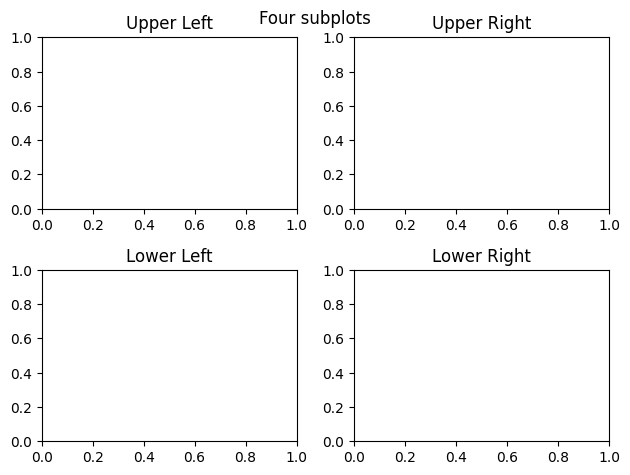

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].set(title="Upper Left")
axes[0, 1].set(title="Upper Right")
axes[1, 0].set(title="Lower Left")
axes[1, 1].set(title="Lower Right")

# tight_layout makes sure titles and tick labels do not overlap.
fig.tight_layout()
fig.suptitle("Four subplots")

plt.show()

**Beschäftigen Sie sich jetzt erneut mit den Grundlagen von Matplotlib! Machen Sie sich insbesondere den Grundaufbau und die Anatomie von Plots bewusst.**

## Plotten von Funktionen

Wir haben viel über die Darstellung von Daten gesprochen, aber noch nicht über das eigentliche Plotten von Daten. Matplotlib hat eine Reihe von verschiedenen Plot-Funktionen - viel mehr, als wir hier behandeln werden, in der Tat. Es gibt eine vollständigere Liste in der pyplot-Dokumentation, und die Matplotlib-Galerie ist ein großartiger Ort, um Beispiele für all diese Funktionen zu bekommen.  

Allerdings kann eine vollständige Liste und/oder die Galerie am Anfang etwas überwältigend sein. Stattdessen werden wir es kondensieren und Ihnen einen Blick auf einige derjenigen geben, die Sie am wahrscheinlichsten benutzen werden, und dann eine Untermenge davon im Detail durchgehen.

Hier ist ein vereinfachter visueller Überblick über die am häufigsten verwendeten Plot-Typen von matplotlib.  Schauen wir uns diese an, und dann gehen wir auf einige davon näher ein. Wenn Sie auf eines dieser Bilder klicken, gelangen Sie zu dem Code, der sie erzeugt hat. Wir überspringen das für den Moment, aber schauen Sie es sich später gerne an.

Entfernt das '`#`'-Zeichen und schaut euch die Argumente in der Dokumentation an, mit denen wir den Plot konfigurieren können:

In [18]:
#plt.plot?

### Eingangsdaten: 1D-Reihe

Wir haben kurz `ax.plot(x, y)` und `ax.scatter(x, y)` erwähnt, um Linien bzw. Punkte zu zeichnen.  Wir werden einige ihrer Optionen (Marker, Farben, Linienstile, etc.) im nächsten Abschnitt behandeln. Kommen wir nun zu ein paar anderen gängigen Diagrammtypen.

### Balkenplots: `ax.bar(...)` und `ax.barh(...)`

Balkenplots sind einer der am häufigsten verwendeten Plot-Typen.  Matplotlibs Methode `ax.bar(...)` kann auch allgemeine Rechtecke plotten, aber die Voreinstellung ist für eine einfache Folge von x-, y-Werten optimiert, wobei die Rechtecke eine konstante Breite haben.  Es gibt auch `ax.barh(...)` (für horizontal), die eine konstante Höhe statt einer konstanten Breite annimmt.

### Einfaches Balkendiagramm

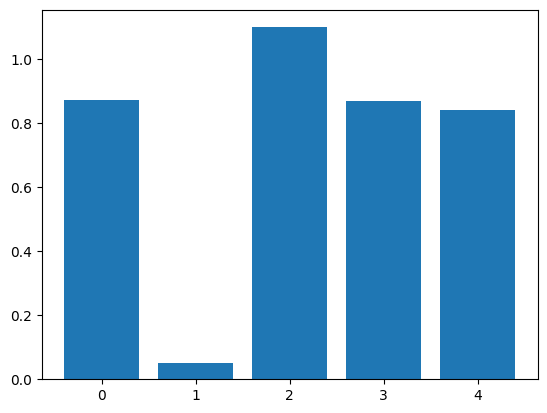

In [19]:
np.random.seed(2)
x = np.arange(5)
y = np.random.random(5) * 2

fig, ax = plt.subplots()
ax.bar(x, y)
plt.show()

In [20]:
x

array([0, 1, 2, 3, 4])

In [21]:
y

array([0.8719898 , 0.05185246, 1.09932496, 0.87064479, 0.8407356 ])

Hinzufügen von Fehlerbalken...

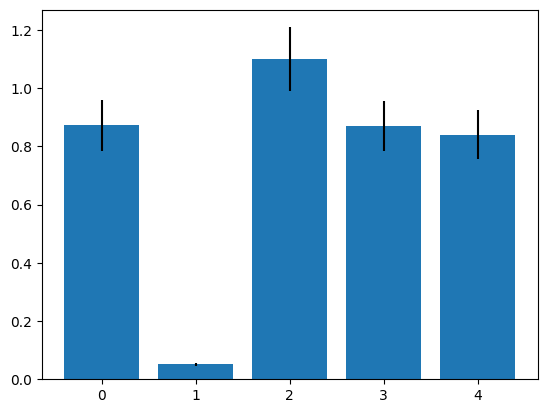

In [22]:
np.random.seed(2)
x = np.arange(5)
y = np.random.random(5) * 2
error = y * 0.1

fig, ax = plt.subplots()
ax.bar(x, y, yerr=error)
plt.show()

Wenn wir negative Werte haben, können wir mit `axhline` ein Achsen-"Rückgrat" zeichnen, um die Nulllinie zu markieren.

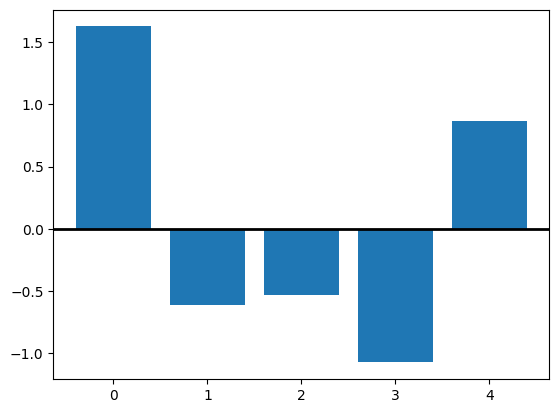

In [23]:
np.random.seed(1)
x = np.arange(5)
y = np.random.randn(5)

fig, ax = plt.subplots()
ax.bar(x, y)
ax.axhline(y=0, color='black', linewidth=2)
plt.show()

Matplotlib Plot-Methoden geben einen `Artist` oder eine Folge von Artists zurück.  Alles, was Sie in einer Matplotlib-Figur/Achse/etc sehen können, ist ein `Artist` von irgendeiner Art. Die meiste Zeit werden Sie diese zurückgegebenen Objekte nicht behalten müssen. Sie werden sie für spezielle Anpassungen erfassen wollen, die über den normalen Plotmechanismus nicht möglich sind.

Schauen wir uns das letzte Beispiel noch einmal an und ändern wir, was gezeichnet wird.  Im Fall von `bar` wird ein Container-Artist zurückgegeben, so dass wir dessen Inhalt anstelle des Containers selbst ändern (also `for bar in vert_bars`).

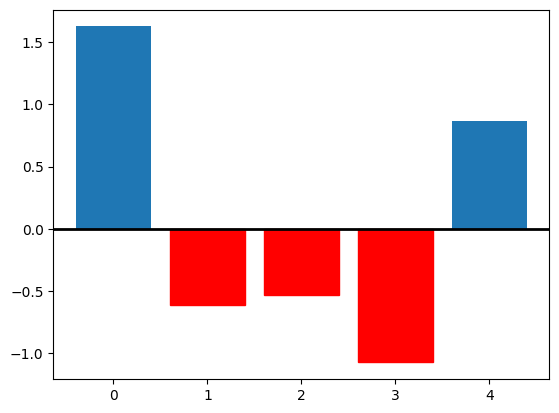

In [24]:
fig, ax = plt.subplots()
vert_bars = ax.bar(x, y) # Store the output of the call to .bar

# We could have also done this with two separate calls to `ax.bar` and numpy boolean indexing.
for bar, height in zip(vert_bars, y):
    if height < 0:
        bar.set(color='red')
        
ax.axhline(y=0, color='black', linewidth=2)

plt.show()

Wenn wir uns die von `ax.bar` zurückgegebenen Artists ansehen, können wir sehen, dass sie alle einfache Rechtecke sind.

In [25]:
for bar in vert_bars:
    print(bar)

Rectangle(xy=(-0.4, 0), width=0.8, height=1.62435, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=-0.611756, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=-0.528172, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=-1.07297, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=0.865408, angle=0)


### Gefüllte Regionen: `ax.fill(x, y)`, `fill_between(...)`, etc

Von diesen Funktionen ist `ax.fill_between(...)` wahrscheinlich diejenige, die Sie am häufigsten benutzen werden.  In ihrer einfachsten Form füllt sie zwischen den angegebenen y-Werten und 0 auf:

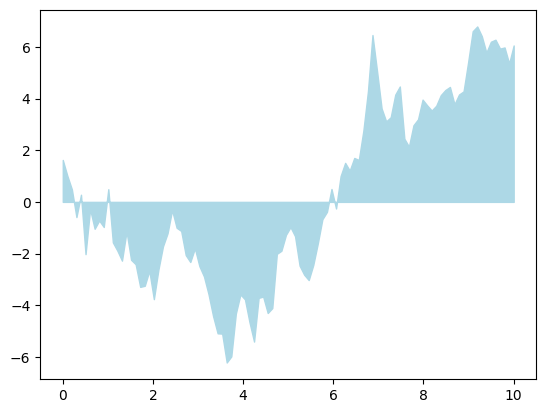

In [26]:
np.random.seed(1)
y = np.random.randn(100).cumsum()
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
ax.fill_between(x, y, color='lightblue')
plt.show()

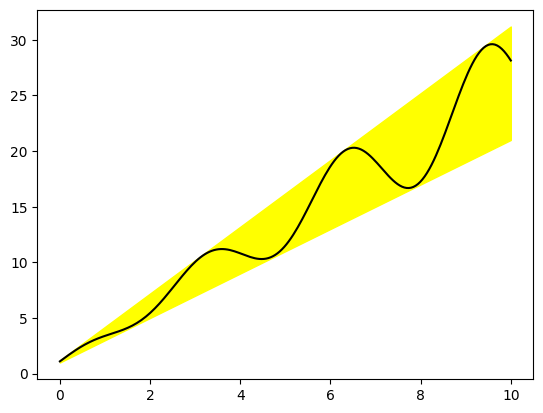

In [27]:
x = np.linspace(0, 10, 200)
y1 = 2 * x + 1
y2 = 3 * x + 1.2
y_mean = 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1

fig, ax = plt.subplots()

# Plot the envelope with `fill_between`
ax.fill_between(x, y1, y2, color='yellow')

# Plot the "centerline" with `plot`
ax.plot(x, y_mean, color='black')

plt.show()

## Eingangsdaten: 2D-Arrays oder Bilder

Es gibt mehrere Optionen zum Plotten von 2D-Datensätzen.  `imshow`, `pcolor` und `pcolormesh` haben auf den ersten Blick eine Menge Überschneidungen.  Das obige Bild soll das etwas verdeutlichen.


Kurz gesagt, `imshow` kann große Arrays sehr schnell interpolieren und darstellen, während `pcolormesh` und `pcolor` viel langsamer sind, aber mit flexiblen (d.h. mehr als nur rechteckigen) Anordnungen von Zellen umgehen können.

Wir werden uns hier nicht zu sehr mit den Unterschieden und Überschneidungen aufhalten.  Sie haben überlappende Fähigkeiten, aber ein unterschiedliches Standardverhalten, weil ihre primären Anwendungsfälle etwas anders sind (es gibt auch `matshow`, das `imshow` mit anderen Standardeinstellungen ist).  

Stattdessen werden wir uns auf das konzentrieren, was sie gemeinsam haben.

`imshow`, `pcolor`, `pcolormesh`, `scatter` und alle anderen Matplotlib-Darstellungsmethoden, die einen Bereich von Datenwerten auf eine Farbkarte abbilden, geben Artists zurück, die Instanzen von `ScalarMappable` sind. In der Praxis bedeutet das, dass a) Sie einen Farbbalken für sie anzeigen können und b) sie mehrere Schlüsselwortargumente teilen.

### 2d-Daten mit `imshow` anzeigen

In [28]:
arr_2d = np.arange(9).reshape((3, 3))
arr_2d

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

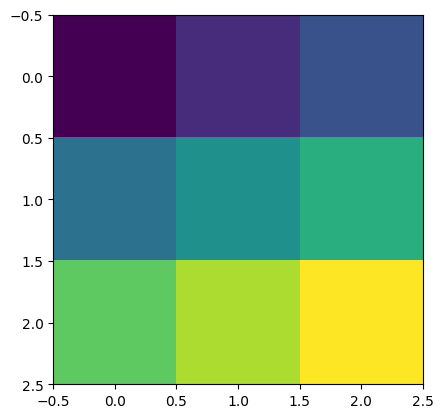

In [29]:
fig, ax = plt.subplots()
ax.imshow(arr_2d)
plt.show()

`imshow` wird meist zur Anzeige von Bildern verwendet.

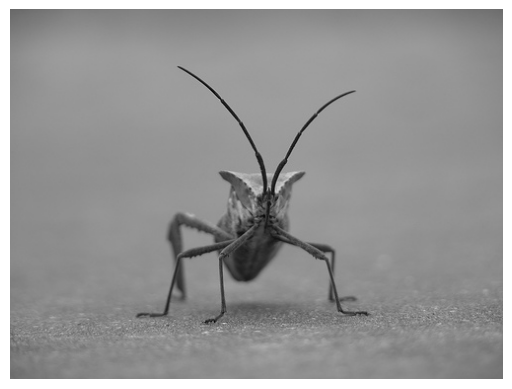

In [30]:
# Read images into numpy array. Usually imageio would be used here.
# see https://imageio.github.io/
img = plt.imread("images/05/stinkbug.png")

fig, ax = plt.subplots()
ax.imshow(img)
ax.axis("off")
plt.show()

Für die Visualisierung von Matrizen bietet `matshow` bessere Vorgaben, z.B. für die Achsenbeschriftung.

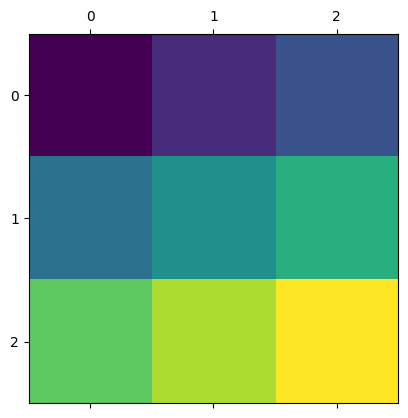

In [31]:
fig, ax = plt.subplots()
ax.matshow(arr_2d)
plt.show()

### Farbbalken

Nur die Farben zu sehen, sagt nicht unbedingt etwas über die darunter liegenden Werte aus. Fügen wir der Abbildung einen Farbbalken hinzu, um anzuzeigen, welche Farben den Werten der aufgezeichneten `data` entsprechen. 

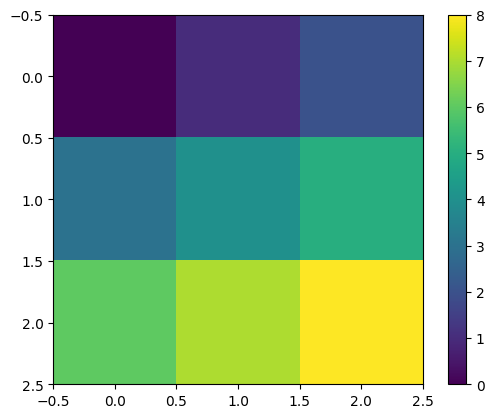

In [32]:
fig, ax = plt.subplots()
im = ax.imshow(arr_2d)
fig.colorbar(im)
plt.show()

In [33]:
arr_2d

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Sie werden feststellen, dass `colorbar` eine `Figure`-Methode ist und keine `Axes`-Methode.  Das liegt daran, dass `colorbar` nicht auf den Achsen operiert. Stattdessen werden die aktuellen Achsen um ein Stück verkleinert, eine _neue_ Achse zur Figur hinzugefügt und der Farbbalken auf diese Achse gesetzt.

Die neue Achse, die `fig.colorbar` erzeugt, ist ziemlich eingeschränkt, wo sie positioniert werden kann.   Zum Beispiel liegt sie immer außerhalb der Achsen, von denen sie Platz "stiehlt". Manchmal möchten Sie vielleicht vermeiden, dass der Farbbalken Platz von einer Achse "stiehlt" oder dass er sogar _innerhalb_ einer anderen Achse liegt.  In diesem Fall können Sie die Achsen für den Farbbalken manuell erstellen und ihn dort positionieren, wo Sie es wünschen:

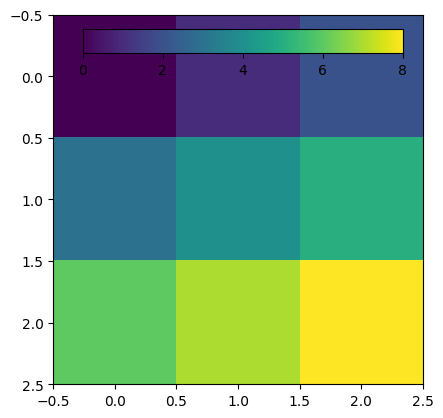

In [34]:
fig, ax = plt.subplots()
cax = fig.add_axes([0.27, 0.8, 0.5, 0.05])

im = ax.imshow(arr_2d)
fig.colorbar(im, cax=cax, orientation='horizontal')
plt.show()

### Gemeinsame Parameter für `imshow`, `pcolormesh`, `contour`, `scatter`, etc
  
  Wie wir bereits erwähnt haben, hat jede Plot-Methode, die ein `ScalarMappable` erzeugt, einige gemeinsame kwargs.  Diejenigen, die Sie am häufigsten verwenden werden, sind:
  
  * `cmap` : Die Farbkarte (oder der Name der Farbkarte), die zur Darstellung der Eingabe verwendet wird.  (Wir werden die verschiedenen Farbkarten im nächsten Abschnitt durchgehen.)
  * `vmin` : Der minimale Datenwert, der dem "Boden" der Farbkarte entspricht (standardmäßig das Minimum Ihrer Eingabedaten).
  * `vmax` : Der maximale Datenwert, der dem "oberen" Bereich der Farbkarte entspricht (Standardwert ist der maximale Wert Ihrer Eingabedaten).
  * `norm` : Eine `Normalize`-Instanz, um zu steuern, wie die Datenwerte auf die Farbkarte abgebildet werden. Standardmäßig ist dies eine lineare Skalierung zwischen `vmin` und `vmax`, aber auch andere Normen sind verfügbar (z.B. `LogNorm`, `PowerNorm`, etc).
  
`vmin` und `vmax` sind besonders nützlich.  Oftmals möchten Sie, dass die Farben auf einen bestimmten Bereich von Datenwerten abgebildet werden, der nicht das Minimum/Maximum Ihrer Eingabedaten ist. Zum Beispiel könnten Sie einen symmetrischen Wertebereich um 0 herum haben wollen.

Als Beispiel dafür wollen wir eine divergente Farbzuordnung auf einige Beispieldaten anwenden. Beachten Sie, dass die Farbkarte **nicht** bei Null zentriert ist.

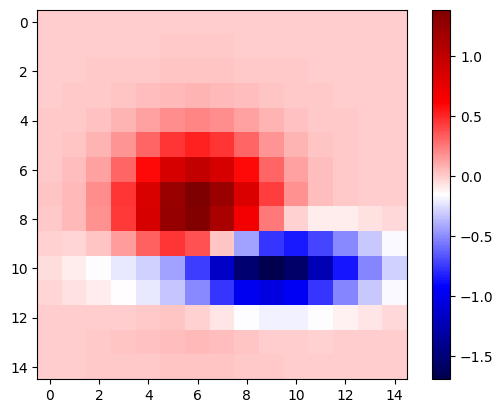

In [35]:
from matplotlib.cbook import get_sample_data
data = get_sample_data('axes_grid/bivariate_normal.npy')

fig, ax = plt.subplots()
im = ax.imshow(data, cmap='seismic')
fig.colorbar(im)
plt.show()

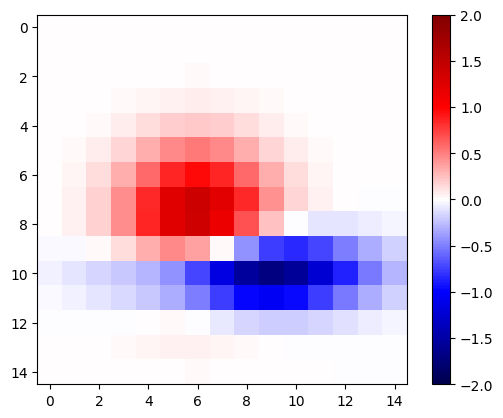

In [36]:
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='seismic', vmin=-2, vmax=2)
fig.colorbar(im)
plt.show()

### Scatter für n-dimensionale Daten
`scatter` erlaubt es, mehrere Dimensionen auf verschiedene Ästhetiken wie x-Position, Farbe, Größe und Form abzubilden.

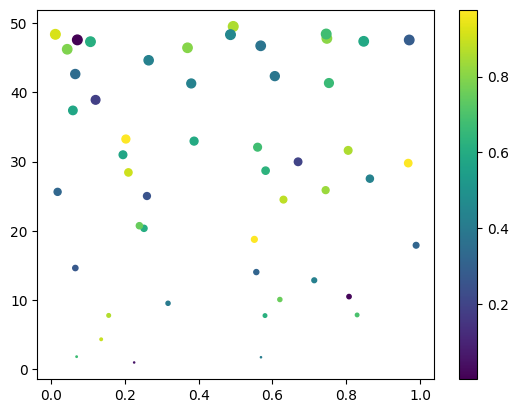

In [37]:
n = 50
x1 = np.random.random(n)
x2 = np.random.random(n) * 50
x3 = np.random.random(n)
y = x1 + x2 + x3

fig, ax = plt.subplots()
sc = ax.scatter(x=x1, y=y, s=x2, c=x3, marker='o')
fig.colorbar(sc)
plt.show()

Es gibt viele verschiedene Marker, die Matplotlib unterstützt und die helfen können, verschiedene Verteilungen hervorzuheben. Schauen Sie unter https://matplotlib.org/3.2.1/api/markers_api.html#module-matplotlib.markers nach, um eine Liste der Marker-Optionen zu erhalten.

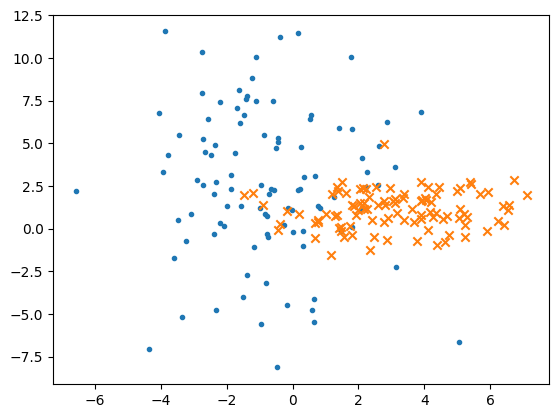

In [38]:
num = 100
x1 = np.random.normal(-1, 2, num)
y1 = np.random.normal(3, 4, num)
x2 = np.random.normal(3, 2, num)
y2 = np.random.normal(1, 1, num)

fig, ax = plt.subplots()
ax.scatter(x1, y1, marker='.')
ax.scatter(x2, y2, marker='x')
plt.show()

**Wiederholen Sie jetzt kurz die Verschiedenen Möglichkeiten, 1D-Datenreihen, 2D-Datenreihen und Bilder zu plotten! Sie können es am besten selbst ausprobieren!**


## Visualisierung statistischer Verteilungen

Ziehen Sie Samples aus einer Normalverteilung.

In [39]:
μ = 0
σ = 1
num_samples = 1000
dist = np.random.normal(μ, σ, num_samples)

**Nebenbemerkung zu Unicode-Zeichen als Variablen:** Seit Python 3 können wir beliebige Unicode-Zeichen wie μ und σ als Variablen verwenden. Dies kann in der wissenschaftlichen Programmierung sinnvoll sein, wenn starke Namenskonventionen bestehen. Ein gutes Beispiel sind Mittelwert und Standardabweichung einer Normalverteilung. Um gängige Zeichen einfach zu erhalten, können Sie den Latex-Stil verwenden und z. B. `\mu` gefolgt von <kbd>tab</kbd> eingeben, um μ zu erhalten. Verwenden Sie dies jedoch nicht übermäßig. Eindeutig benannte Zeichen sind oft einfacher zu lesen.

### Histogramme
Histogramme sind eine gute Möglichkeit, univariate Verteilungen zu visualisieren. Die Daten werden in gleichgroße Bins unterteilt. Dann wird gezählt, wie viele Datenpunkte in jedes Feld fallen. Schließlich zeichnen wir einen Balken mit der Breite des entsprechenden Bins und der Höhe der Zählung.

Das Standardhistogramm sieht wie folgt aus.

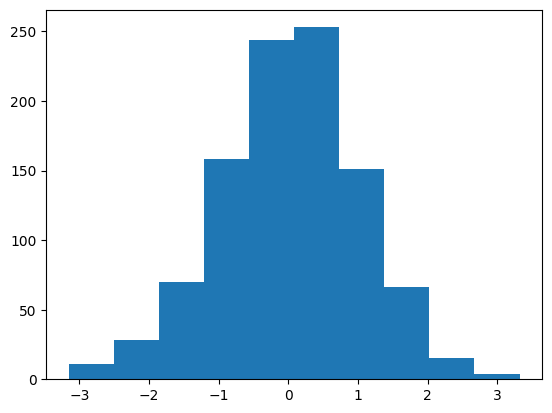

In [40]:
fig, ax = plt.subplots()
ax.hist(dist)
plt.show()

Wir können die Anzahl der Bins steuern.

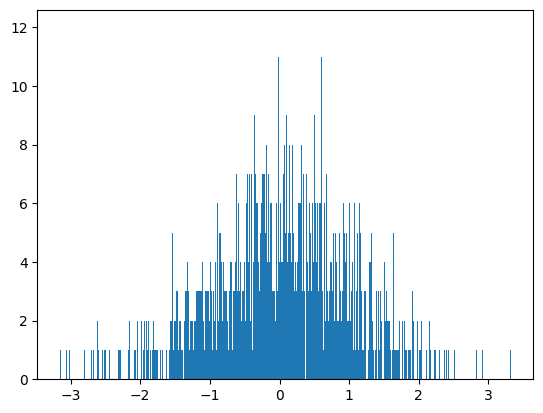

In [41]:
fig, ax = plt.subplots()
ax.hist(dist, bins=500)
plt.show()

Oder lassen Sie es automatisch ermitteln.

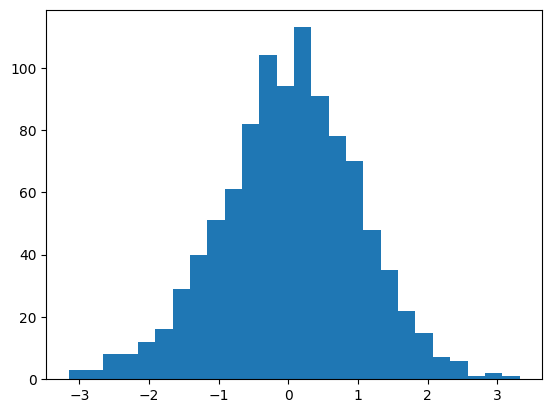

In [42]:
fig, ax = plt.subplots()
ax.hist(dist, bins='auto')
plt.show()

Mit `density=True` wird ein normalisiertes Histogramm erzeugt, das als Wahrscheinlichkeitsdichte interpretiert werden kann.

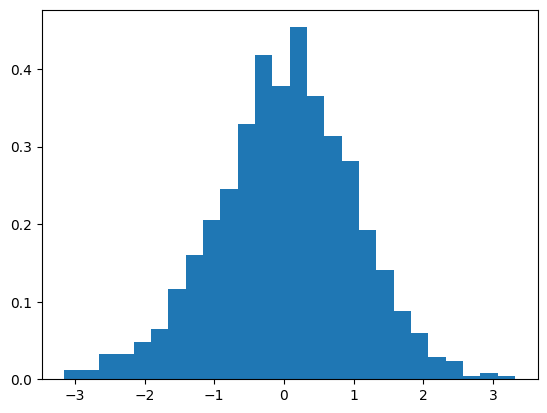

In [43]:
fig, ax = plt.subplots()
ax.hist(dist, bins='auto', density=True)
plt.show()

### Boxplots

Boxplots sind eine weitere Standardmethode, um univariate Verteilungen zusammenzufassen. Sie bieten eine kompakte visuelle Beschreibung wichtiger *Zusammenfassungsstatistiken*. 

Eine Box wird am 25 %- und 75 %-Quantil gezeichnet, also dort, wo die meisten Daten liegen. Zusätzlich wird der Median durch eine Linie innerhalb des Kastens markiert.

Die *Whisker* erstrecken sich über das 1,5-fache des *Zwischenquartilsbereichs* über die Quartile hinaus. Jeder Punkt darüber hinaus wird einzeln als *Flier* oder *Ausreißer* gezeichnet. Siehe auch https://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/ für eine schöne Illustration.

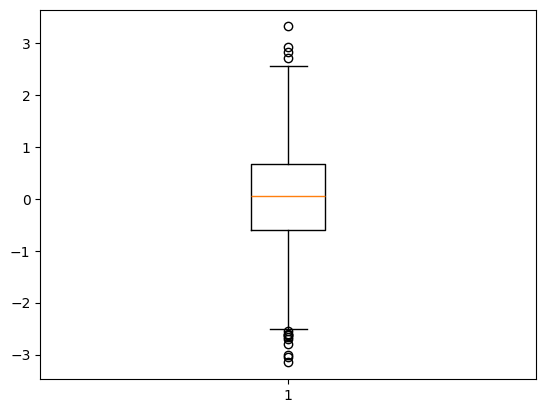

In [44]:
fig, ax = plt.subplots()
ax.boxplot(dist)
plt.show()

`boxplot` kann auch verwendet werden, um mehrere Verteilungen auf einmal darzustellen.

In [45]:
import reprlib # This is for obtaining printable versions of large data sets.
means = [0, -1, 2.5, 4.3, -3.6]
sigmas = [1.2, 5, 3, 1.5, 2]
# Each distribution has a different number of samples.
nums = [150, 1000, 100, 200, 500]

dists = [np.random.normal(*args) for args in zip(means, sigmas, nums)]
reprlib.repr(dists)

'[array([ 2.616...08413127e+00]), array([ -7.88... -5.45628819]), array([ 3.249...  1.8530462 ]), array([3.5523..., 5.12353406]), array([-4.204...78190226e+00])]'

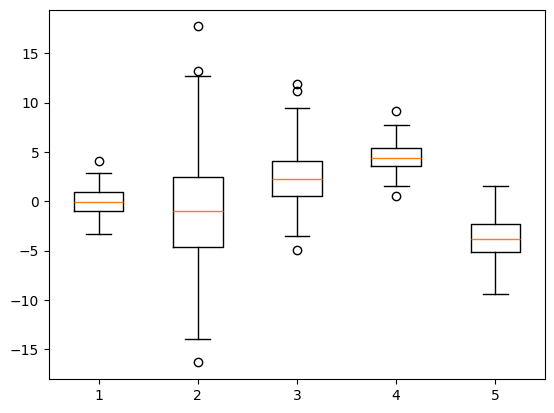

In [46]:
fig, ax = plt.subplots()
ax.boxplot(dists)
plt.show()

### Violinplots
Violinplots sind eine dritte gängige Methode zur Visualisierung von Verteilungen. Für Violinplots wird eine *Kernel-Dichte-Schätzung* für den gesamten Bereich der Daten berechnet. Dies ergibt eine glatte Schätzung der Wahrscheinlichkeitsdichtefunktion, die den Daten zugrunde liegt.

Die Funktion `Violinplot` verhält sich ähnlich wie `Boxplot`. Weitere Informationen finden Sie unter https://en.wikipedia.org/wiki/Violin_plot.

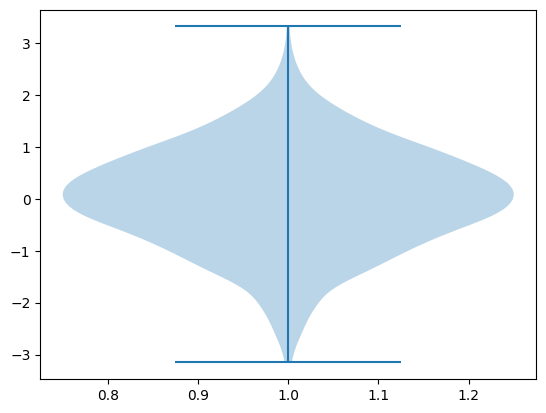

In [47]:
fig, ax = plt.subplots()
ax.violinplot(dist)
plt.show()

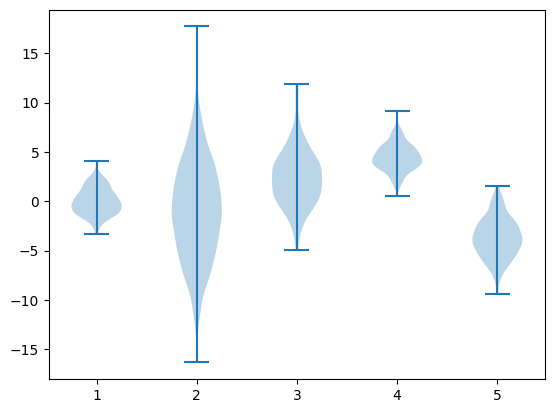

In [48]:
fig, ax = plt.subplots()
ax.violinplot(dists)
plt.show()

### Kreisdiagramme
Kreisdiagramme sind eine bekannte Methode zur Visualisierung von kategorialen Verteilungen.

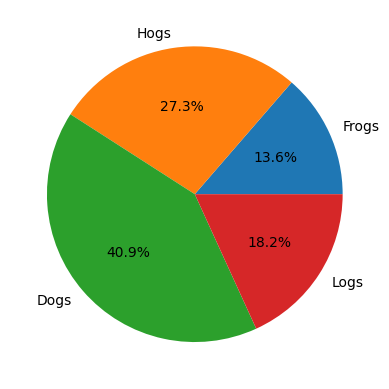

In [49]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 20]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()

## Plots mit Anmerkungen versehen

Besonders bei wissenschaftlichen Abbildungen möchten Sie oft den Teil eines Plots hervorheben, der Ihre Hypothese unterstützt. Mit maplotlib haben Sie die volle Flexibilität, dies mit `annotate` zu tun. Standardmäßig wird nur Text an bestimmten x, y Koordinaten hinzugefügt.  

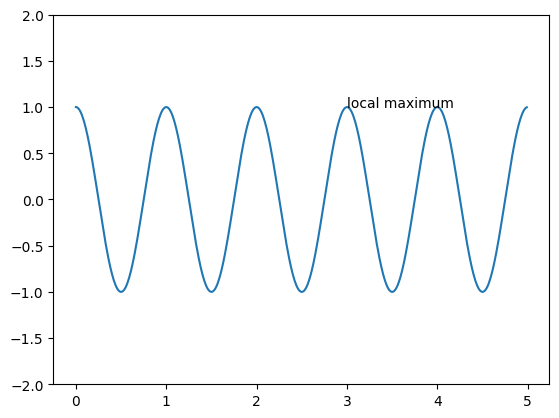

In [50]:
fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

# Plot a line and add some simple annotations
line, = ax.plot(t, s)
ax.annotate('local maximum', xy=(3, 1))
ax.set(ylim=(-2, 2))
plt.show()

Wir können den Text auch an eine andere x, y-Koordinate setzen, indem wir das Argument `xytext` verwenden.

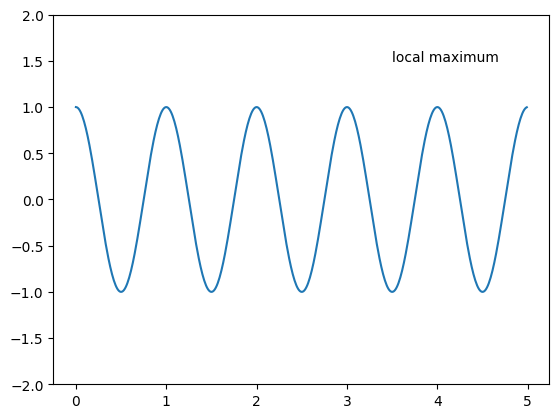

In [51]:
fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

line, = ax.plot(t, s)
ax.annotate(
    'local maximum', 
    xy=(3, 1), 
    xytext=(3.5, 1.5)
)

ax.set(ylim=(-2, 2))
plt.show()

Da wir nun zwei x, y - Koordinaten haben, können wir sie mit Pfeilen verbinden.

[(-2.0, 2.0)]

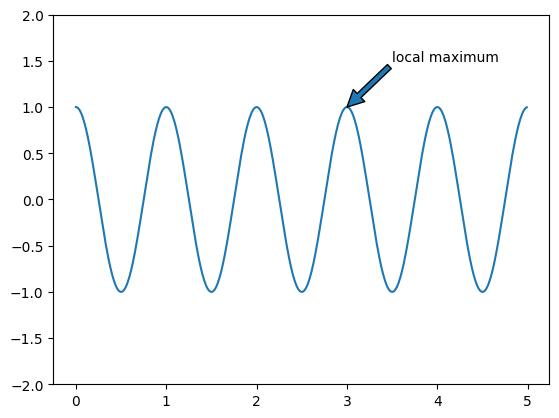

In [52]:
fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

# Plot a line and add some simple annotations
line, = ax.plot(t, s)
ax.annotate(
    'local maximum', 
    xy=(3, 1), 
    xytext=(3.5, 1.5),
    arrowprops=dict()
)

ax.set(ylim=(-2, 2))

Wenn es sein muss, können wir uns mit den Pfeilstilen sehr viel Mühe geben. Unter https://matplotlib.org/tutorials/text/annotations.html finden Sie eine detaillierte Übersicht.

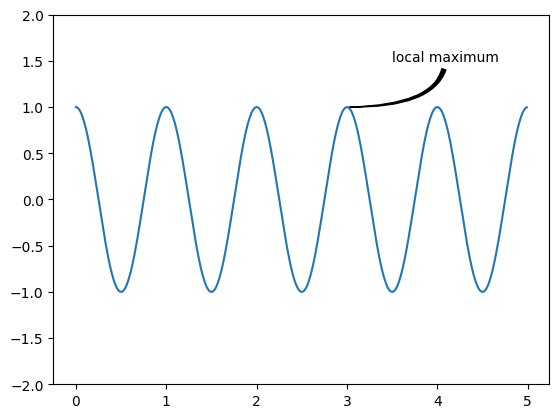

In [53]:
fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

# Plot a line and add some simple annotations
line, = ax.plot(t, s)
ax.annotate(
    'local maximum', 
    xy=(3, 1), 
    xytext=(3.5, 1.5),
    arrowprops=dict(arrowstyle='wedge', connectionstyle="angle3", facecolor="black")
)

ax.set(ylim=(-2, 2))
plt.show()

**Machen Sie sich jetzt mit dem ersten Plotten von statistischen Verteilungen sowie dem Hinzufügen von Anmerkungen an Plots vertraut!**

## Wie man "Matplotlib" spricht

In den vorangegangenen Teilen haben Sie gelernt, wie Matplotlib die Erstellung von Diagrammen durch Figuren und Achsen organisiert. Wir haben die Komponenten einer grundlegenden Figur aufgeschlüsselt und gelernt, wie man sie erstellt. Sie haben auch gelernt, wie man eine oder mehrere Achsen zu einer Figur hinzufügt und wie man sie miteinander verbindet. Sie haben sogar gelernt, wie Sie einige der grundlegenden Erscheinungsbilder der Achsen ändern können. Schließlich haben wir einige der vielen Plot-Methoden besprochen, die Matplotlib zum Zeichnen auf diesen Achsen bietet. Mit all diesem Wissen sollten Sie nun in der Lage sein, großartige und wunderbare Figuren zu erstellen.

Warum sind Sie noch hier?

"Wir wissen nicht, wie wir unsere Plots und Figuren steuern können!" sagt irgendeine zufällige Stimme im hinteren Teil des Raumes.

Aber natürlich! In den vorangegangenen Abschnitten haben Sie vielleicht etwas über die Struktur und die Syntax von Matplotlib gelernt, aber es wurde nicht viel von der Substanz und dem Vokabular der Bibliothek beschrieben. In diesem Abschnitt werden viele der Eigenschaften besprochen, die in der gesamten Bibliothek verwendet werden. Beachten Sie, dass viele der Beispiele in diesem Abschnitt zwar eine Art und Weise zeigen, wie eine bestimmte Eigenschaft gesetzt werden kann, dass diese Eigenschaft aber auch an anderer Stelle in einem völlig anderen Kontext anwendbar sein kann. Dies ist die "Sprache" von Matplotlib.

### Farben

Dies ist vielleicht das wichtigste Vokabular in Matplotlib. Da Matplotlib eine Plot-Bibliothek ist, sind Farben mit allem verbunden, was in Ihren Figuren geplottet wird. Matplotlib unterstützt eine [sehr robuste Sprache](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors) zum Spezifizieren von Farben, die einer Vielzahl von Benutzern vertraut sein sollte.

Standardmäßig wählt Matplotlib unterschiedliche Farben, wenn Daten auf denselben Achsen kombiniert werden.

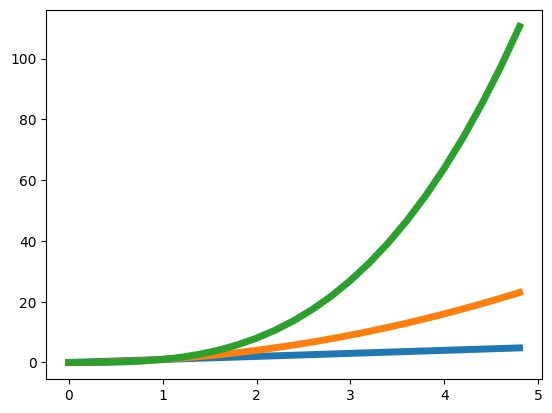

In [54]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5)
ax.plot(t, t**2, linewidth=5)
ax.plot(t, t**3, linewidth=5)
plt.show()

#### Colornames

Zunächst können Farben als Zeichenketten angegeben werden. Für sehr einfache Farben können Sie sogar mit nur einem einzigen Buchstaben auskommen:

- b: blau
- g: grün
- r: rot
- c: Cyan
- m: magenta
- y: gelb
- k: schwarz
- w: weiß

Andere Farbnamen, die erlaubt sind, sind die HTML/CSS-Farbnamen wie "burlywood" und "chartreuse". Siehe die [vollständige Liste](https://www.w3schools.com/colors/colors_names.asp) der 147 Farbnamen.

#### Hex-Werte

Farben können auch durch Angabe einer HTML/CSS-Hex-Zeichenkette angegeben werden, z. B. `'#0000FF'` für Blau. Unterstützung für einen optionalen Alphakanal wurde für v2.0 hinzugefügt. Weitere Informationen über Hex-Farben finden Sie unter https://en.wikipedia.org/wiki/Web_colors#Hex_triplet.

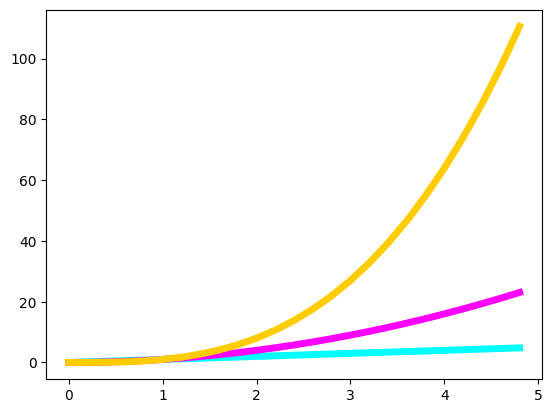

In [55]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5, color='#00ffff')
ax.plot(t, t**2, linewidth=5, color='#ff00ff')
ax.plot(t, t**3, linewidth=5, color='#ffcc00')
plt.show()

### 256 Graustufen

Eine Graustufe kann anstelle einer Farbe angegeben werden, indem eine String-Repräsentation einer Zahl zwischen 0 und 1 (einschließlich) übergeben wird. `'0.0'` ist schwarz, während `'1.0'` weiß ist. `'0.75'` wäre ein heller Grauton.

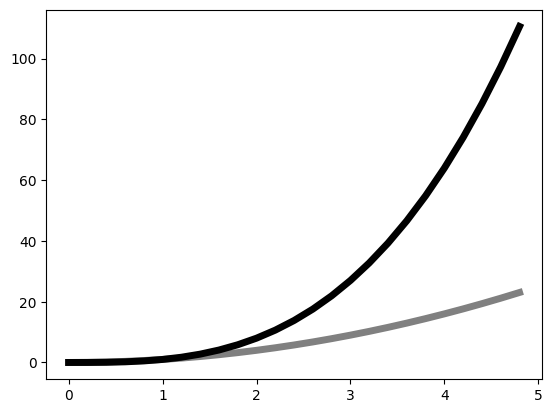

In [56]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5, color='1.0')
ax.plot(t, t**2, linewidth=5, color='0.5')
ax.plot(t, t**3, linewidth=5, color='0.0')
plt.show()

### RGB[A]-Tupel

Es kann sein, dass Sie auf Fälle stoßen, in denen die vorherigen Methoden zur Angabe von Farben nicht funktionieren. Dies kann manchmal in einigen der tieferen, unbekannteren Ebenen der Bibliothek vorkommen. Wenn alles andere versagt, ist die universelle Sprache der Farben für Matplotlib das RGB[A]-Tupel. Dies ist das "Rot"-, "Grün"-, "Blau"- und manchmal "Alpha"-Tupel von Fließkommazahlen im Bereich von [0, 1]. Eins bedeutet volle Sättigung dieses Kanals, also wäre ein rotes RGBA-Tupel `(1.0, 0.0, 0.0, 1.0)`, während ein teilweise transparentes grünes RGBA-Tupel `(0.0, 1.0, 0.0, 0.75)` wäre.  In der Dokumentation wird normalerweise angegeben, ob RGB- oder RGBA-Tupel akzeptiert werden. Manchmal wird eine Liste von Tupeln für mehrere Farben benötigt, und Sie können in solchen Fällen sogar ein Nx3- oder Nx4-Numpy-Array angeben.

Bei Funktionen wie `plot()` und `scatter()` sieht es zwar so aus, als ob sie eine Farbspezifikation annehmen können, aber was sie wirklich brauchen, ist eine "Formatspezifikation", die die Farbe als Teil des Formats enthält. Leider sind solche Spezifikationen nur Zeichenketten und daher werden RGB[A]-Tupel für solche Argumente nicht unterstützt (Sie können aber trotzdem ein RGB[A]-Tupel für ein "color"-Argument übergeben).

Oftmals gibt es ein separates Argument für "alpha", in dem Sie eine Farbe angeben können. Der Wert für "alpha" hat normalerweise Vorrang vor dem Alpha-Wert im RGBA-Tupel. Es gibt keine einfache Möglichkeit, diese Inkonsistenz zu umgehen.

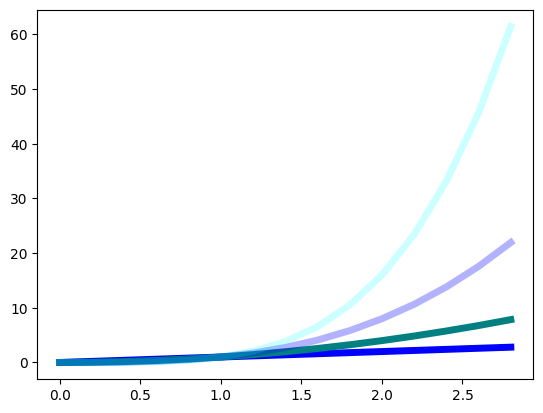

In [57]:
t = np.arange(0.0, 3.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5, color=(0, 0, 1))
ax.plot(t, t**2, linewidth=5, color=(0, 0.5, 0.5))
ax.plot(t, t**3, linewidth=5, color=(0, 0, 1, 0.3))
# the alpha value can also be specified as an additional kwarg
ax.plot(t, t**4, linewidth=5, color=(0, 1, 1), alpha=0.2)
plt.show()

### Cycle-Referenzen

Mit dem Aufkommen immer ausgefallenerer Farbzyklen, die aus den vielen verfügbaren Stilen stammen, brauchten die Benutzer eine Möglichkeit, diese Farben im Stil zu referenzieren, ohne explizit zu wissen, was sie sind. Daher wurde in Version 2.0 die Möglichkeit hinzugefügt, die ersten 10 Iterationen des Farbzyklus zu referenzieren. Überall, wo man eine Farbe angeben kann, kann man eine 2-Zeichen-Zeichenkette 'C#' angeben. So wäre 'C0' die erste Farbe, 'C1' die zweite, und so weiter und so fort bis 'C9'.

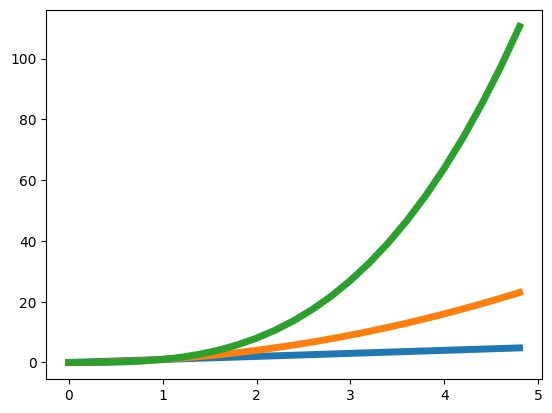

In [58]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5)
ax.plot(t, t**2, linewidth=5)
ax.plot(t, t**3, linewidth=5)
plt.show()

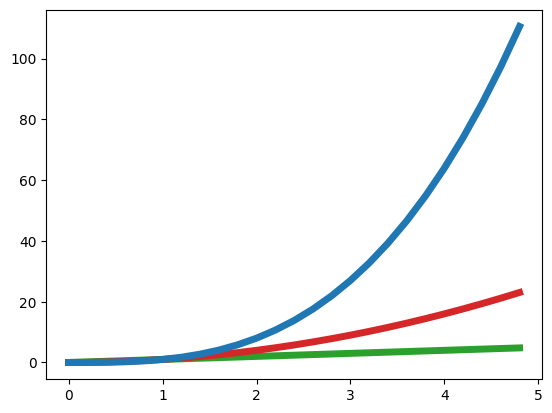

In [59]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5, color='C2')
ax.plot(t, t**2, linewidth=5, color='C3')
ax.plot(t, t**3, linewidth=5, color='C0')
plt.show()

### Marker
[Marker](http://matplotlib.org/api/markers_api.html) werden üblicherweise in [`plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) und [`scatter()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) Plots verwendet, tauchen aber auch an anderen Stellen auf. Es steht eine große Anzahl von Markern zur Verfügung, und es können sogar eigene Marker angegeben werden.

Marker     | Beschreibung       | Marker    |  Beschreibung      | Marker   | Beschreibung   | Marker    | Beschreibung  
:----------|:-------------------|:----------|:-------------------|:---------|:---------------|:----------|:--------------
"."        |  Punkt             | "+"       |  Plus              |","       |  Pixel         | "x"       |  Kreuz
"o"        |  Kreis             | "D"       |  Diamant           |"d"       |  Thin Diamant  |           |
"8"        |  Achteck           | "s"       |  Quadrat           |"p"       |  Fünfeck       | "\*"      |  Stern
"&#124;"   |  vertikale Linie   | "\_"      |  horizontale Linie | "h"      |  Sechseck 1    | "H"       |  Sechseck 2
0          |  Tick links        | 4         |  Pfeil links       |"<"       | Dreieck links  | "3"       |  Tri links
1          |  Tick rechts       | 5         |  Pfeil rechts      |">"       | Dreieck rechts | "4"       |  Tri rechts
2          |  Tick oben         | 6         | Pfeil oben         |"^"       | Dreieck oben   | "2"       |  Tri oben
3          |  Tick unten        | 7         |  Pfeil unten       |"v"       | Dreieck unten  | "1"       |  Tri unten
"None"     |  Nichts            | `None`    |  Default           |" "       |  Nichts        |""         |  Nichts

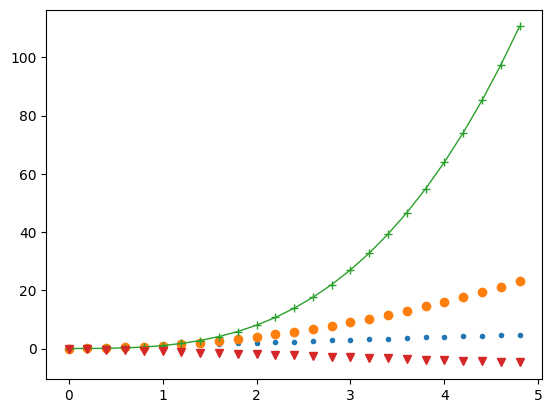

In [60]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, '.', linewidth=5)
ax.plot(t, t**2, 'o', linewidth=5)
ax.plot(t, t**3, marker='+', linewidth=1) # With explicit arguments, you can set maker and linestyle separately.
ax.plot(t, -t, ls='', marker='v', linewidth=5) 
plt.show()

### Linienstile

Linienstile werden in etwa so häufig verwendet wie Farben. Es gibt ein paar vordefinierte Linienstile, die Sie verwenden können. Beachten Sie, dass es einige fortgeschrittene Techniken gibt, um einige benutzerdefinierte Linienstile festzulegen. [Hier](http://matplotlib.org/1.3.0/examples/lines_bars_and_markers/line_demo_dash_control.html) ist ein Beispiel für ein benutzerdefiniertes Strichmuster.

Linienstil | Beschreibung
-----------|------------------------------
'-'        | durchgezogen
'--'       | gestrichelt
'-.'       | dashdot
':'        | gepunktet
'None '    | nichts zeichnen
''         | nichts zeichnen
''         | nichts zeichnen

Verwechseln Sie außerdem nicht ".-" (Linie mit Punktmarkierungen) und "-." (Strich-Punkt-Linie), wenn Sie die Funktion ``plot`` verwenden!

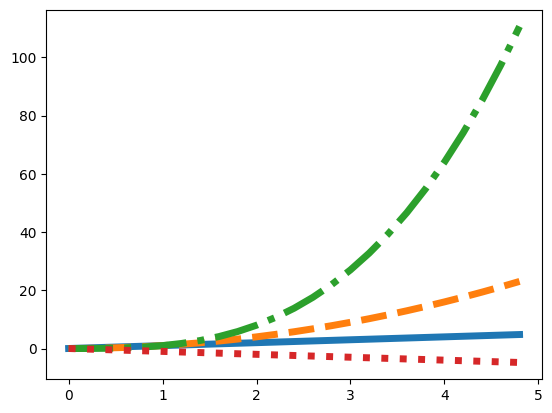

In [61]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linestyle='-', linewidth=5)
ax.plot(t, t**2, linestyle='--', linewidth=5)
ax.plot(t, t**3, linestyle='-.', linewidth=5)
ax.plot(t, -t, linestyle=':', linewidth=5)
plt.show()

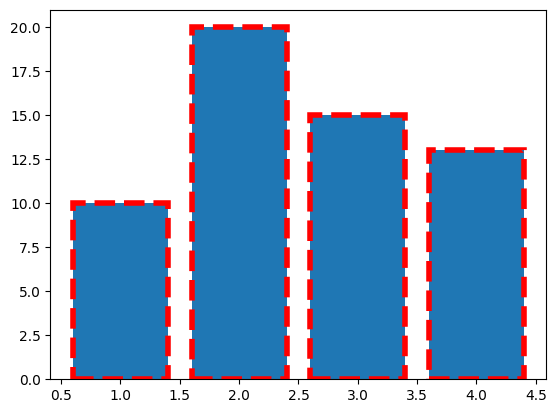

In [62]:
fig, ax = plt.subplots(1, 1)
ax.bar([1, 2, 3, 4], [10, 20, 15, 13], linestyle='--', edgecolor='r', linewidth=4)
plt.show()

### Colormaps

Eine weitere sehr wichtige Eigenschaft vieler Figuren ist die Colormap. Die Aufgabe einer Colormap ist es, einen skalaren Wert mit einer Farbe in Beziehung zu setzen. Zusätzlich zum regulären Teil der Colormap können optional auch eine "Über"-, "Unter"- und "Schlecht"-Farbe definiert werden. NaNs lösen den "schlechten" Teil der Colormap aus.

Wie wir alle wissen, erstellen wir Zahlen, um unseren Lesern Informationen visuell zu vermitteln. Es ist viel Sorgfalt und Überlegung in das Design dieser Colormaps geflossen. Die Wahl der zu verwendenden Farbkarte hängt davon ab, was Sie darstellen möchten. In mpl wurde bisher standardmäßig die "jet"-Farbkarte verwendet, aber das ist oft nicht die Farbkarte, die Sie verwenden möchten. Auf den Mailinglisten wurde viel darüber diskutiert, welche Farbkarte standardmäßig verwendet werden sollte. In der Version 2.0 von Matplotlib wurde eine neue Standard-Farbkarte, 'viridis', eingeführt, zusammen mit einigen anderen stilistischen Änderungen an den Standardeinstellungen.

Hier ist der Vortrag (https://www.youtube.com/watch?v=xAoljeRJ3lU) von Nathaniel Smith und Stéfan van der Walt auf der SciPy 2015, in dem Colormaps hervorragend erklärt werden und wie die neuen perzeptiven einheitlichen Colormaps entwickelt wurden.

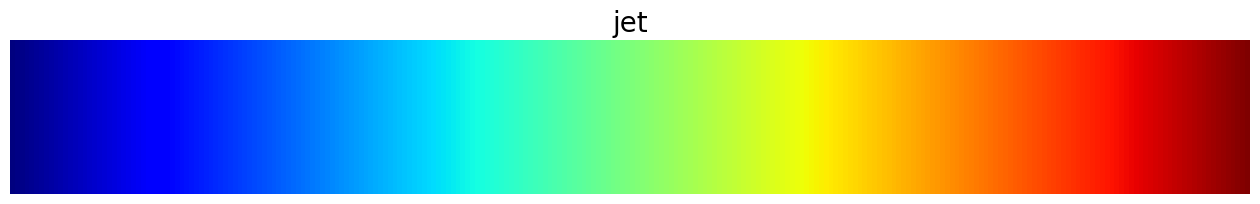

In [63]:
def plot_cmap(name, value_range=(0, 1)):
    gradient = np.linspace(*value_range, 256)
    gradient = np.vstack((gradient, gradient))
    fig, ax = plt.subplots(figsize=plt.figaspect(0.1))
    ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name), vmin=0, vmax=1)
    pos = list(ax.get_position().bounds)
    x_text = pos[0] - 0.01
    y_text = pos[1] + pos[3]/2.
    ax.set_title(name, fontsize=20)
    ax.axis("off")

plot_cmap("jet")

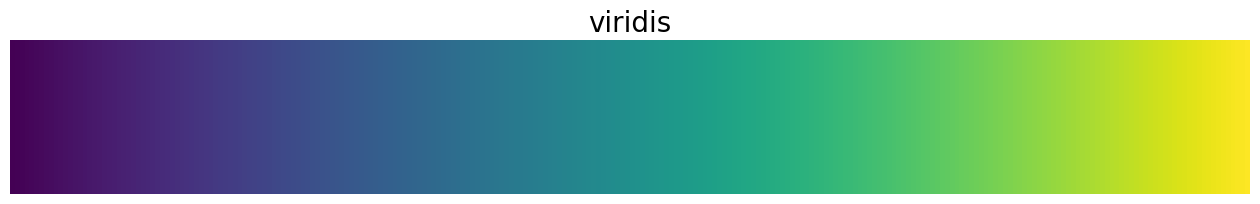

In [64]:
plot_cmap("viridis")

Hier finden Sie die vollständige Galerie aller vordefinierten Farbkarten, geordnet nach den Datentypen, für die sie normalerweise verwendet werden: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

### Mathtext

Oftmals benötigen Sie einfach nur den hochgestellten oder einen anderen mathematischen Text in Ihren Beschriftungen. Für diejenigen, die mit LaTeX vertraut sind, bietet Matplotlib eine sehr einfache Möglichkeit, dies zu tun. Jeder Text, der von Dollarzeichen umgeben ist, wird als "[mathtext](http://matplotlib.org/users/mathtext.html#mathtext-tutorial)" behandelt. Beachten Sie, dass es aufgrund der in LaTeX weit verbreiteten Backslashes oft eine gute Idee ist, dem String-Literal ein `r` voranzustellen, damit Python die Backslashes nicht als Escape-Zeichen behandelt.

In [65]:
print(r"a\nb")

a\nb


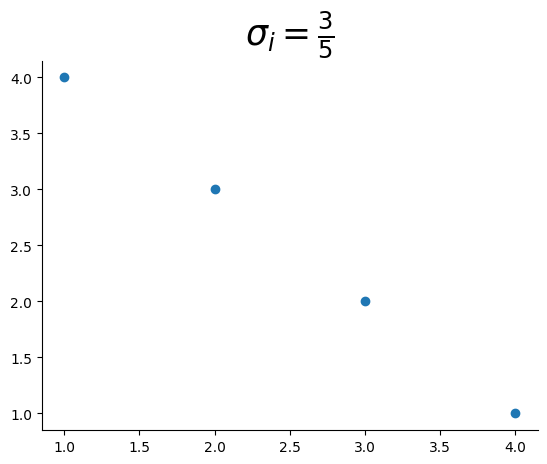

In [66]:
fig, ax = plt.subplots()
ax.scatter([1, 2, 3, 4], [4, 3, 2, 1])
ax.spines['top'].set(visible=False)  # Removing spines so they don't intersect with the title. tight_layout() is not sufficient here.
ax.spines['right'].set(visible=False)
ax.set_title(r'$\sigma_i=\frac{3}{5}$', fontsize=25)
plt.show()

## Begrenzungen, Legenden und Layouts

In diesem Abschnitt konzentrieren wir uns darauf, was an den Rändern der Achsen passiert:  Ticks, ticklabels, limits, layouts, und legends.

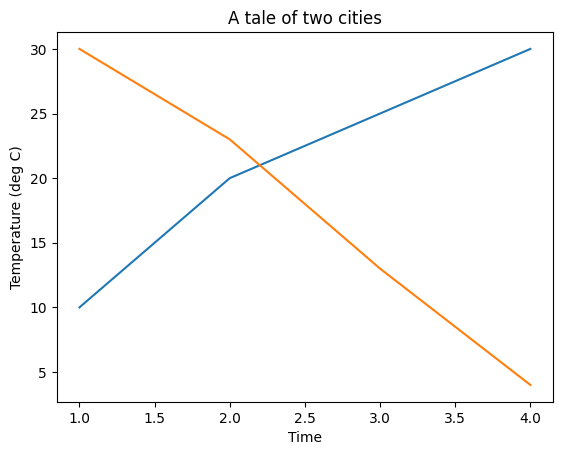

In [67]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30])  # Philadelphia
ax.plot([1, 2, 3, 4], [30, 23, 13, 4])  # Boston
ax.set(ylabel='Temperature (deg C)', xlabel='Time', title='A tale of two cities')
plt.show()

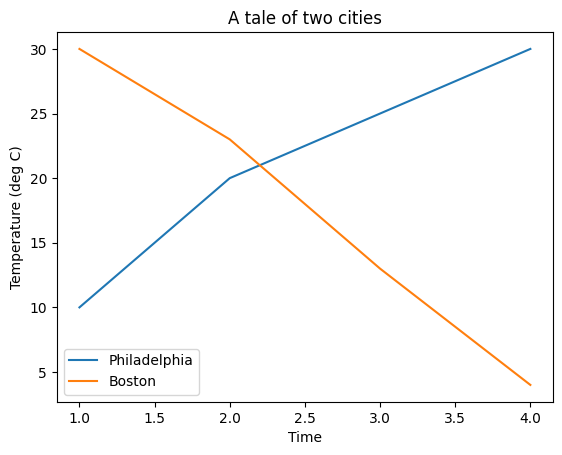

In [68]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], label='Philadelphia')
ax.plot([1, 2, 3, 4], [30, 23, 13, 4], label='Boston')
ax.set(ylabel='Temperature (deg C)', xlabel='Time', title='A tale of two cities')
ax.legend()
plt.show()

Das Schlüsselwortargument `loc` erlaubt es, die Legende an verschiedenen Positionen zu positionieren. Das Argument `'best'` ist das Standardargument, das automatisch die Position wählt, die die Plot-Elemente so wenig wie möglich überlappt.

| Location String | Location Code |
| --- | --- |
| best | 0 |
| upper right | 1 |
| upper left | 2 |
| lower left | 3 |
| lower right | 4 |
| right | 5 |
| center left | 6 |
| center right | 7 |
| lower center | 8 |
| upper center | 9 |
| center | 10 |

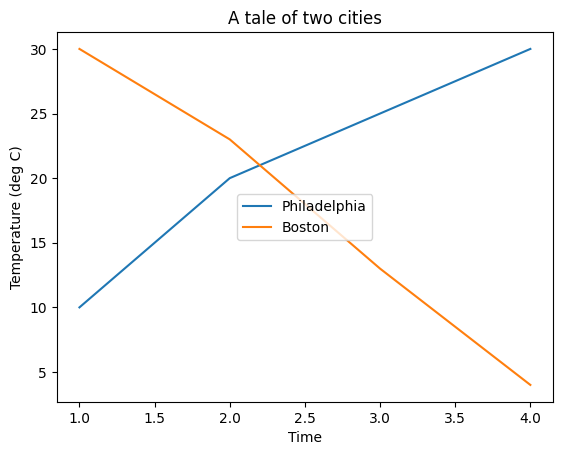

In [69]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], label='Philadelphia')
ax.plot([1, 2, 3, 4], [30, 23, 13, 4], label='Boston')
ax.set(ylabel='Temperature (deg C)', xlabel='Time', title='A tale of two cities')
ax.legend(loc="center")
plt.show()

### Ticks, Tick Lines, Tick Labels and Tickers

Dies ist eine ständige Quelle der Verwirrung:

* Ein Tick ist die *Position* eines Tick Labels.
* Eine Tick Line ist die Linie, die die Position des Ticks angibt.
* Ein Tick Label ist der Text, der an diesem Tick angezeigt wird.
* Ein [`Ticker`](http://matplotlib.org/api/ticker_api.html#module-matplotlib.ticker) bestimmt automatisch die Ticks für eine Achse und formatiert die Tick Labels.

Die Funktion [`tick_params()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.tick_params) wird häufig zur Konfiguration Ihrer Ticker verwendet.

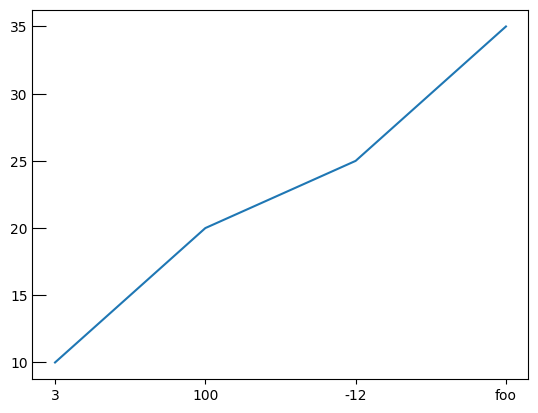

In [70]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 35])

# Manually set ticks and tick labels *on the x-axis* (note ax.xaxis.set, not ax.set!)
ax.xaxis.set(ticks=range(1, 5), ticklabels=[3, 100, -12, "foo"]) 

# Make the y-ticks a bit longer and go both in and out...
ax.tick_params(axis='y', direction='in', length=10)

plt.show()

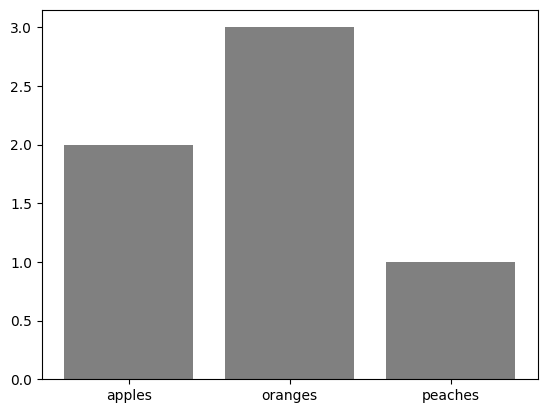

In [71]:
data = [('apples', 2), ('oranges', 3), ('peaches', 1)]
fruit, value = zip(*data)

fig, ax = plt.subplots()
x = np.arange(len(fruit))
ax.bar(x, value, align='center', color='gray')
ax.set(xticks=x, xticklabels=fruit)
plt.show()

### Subplot-Abstand
Der Abstand zwischen den Subplots kann mit [`fig.subplots_adjust()`](http://matplotlib.org/api/pyplot_api.html?#matplotlib.pyplot.subplots_adjust) angepasst werden. Spielen Sie mit dem folgenden Beispiel herum, um zu sehen, wie sich die verschiedenen Argumente auf den Abstand auswirken.

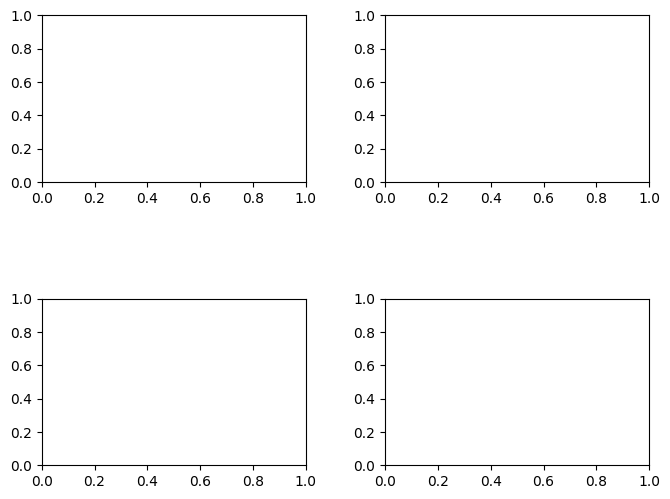

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))
fig.subplots_adjust(wspace=0.3, hspace=0.7,
                   left=0.125, right=0.8,
                   top=0.7,    bottom=0.2)
plt.show()

Ein häufiger "Fehler" ist, dass die Beschriftungen nicht automatisch angepasst werden, um Überschneidungen mit denen eines anderen Subplots zu vermeiden. Matplotlib hat derzeit keine robuste Layout-Engine, da es eine Design-Entscheidung ist, die Menge an "magischem Plotten" zu minimieren. Wir beabsichtigen, den Benutzern eine vollständige, 100%ige Kontrolle über ihre Plots zu ermöglichen. LaTeX-Benutzer sind mit dem Ausmaß an Frustration vertraut, das bei der automatischen Platzierung von Abbildungen in ihren Dokumenten auftreten kann.

Abgesehen davon gab es einige Bemühungen, Werkzeuge zu entwickeln, die den Benutzern helfen können, die häufigsten Probleme zu lösen. Die Funktion "[Tight Layout](http://matplotlib.org/users/tight_layout_guide.html)" versucht, wenn sie aufgerufen wird, die Größe von Rändern und Teilflächen so anzupassen, dass sich nichts überschneidet.

Wenn Sie mehrere Teilflächen haben und überlappende Titel/Achsenbeschriftungen/etc. vermeiden möchten, ist "fig.tight_layout" eine gute Möglichkeit, dies zu tun:

In [73]:
def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=16)
    ax.set_ylabel('y-label', fontsize=8)
    ax.set_title('Title', fontsize=24)

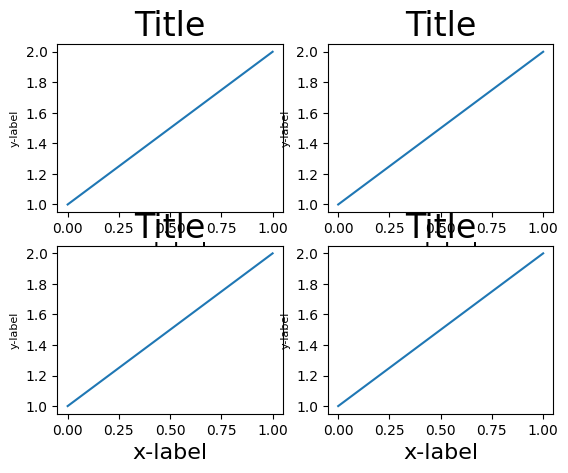

In [74]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

plt.show()

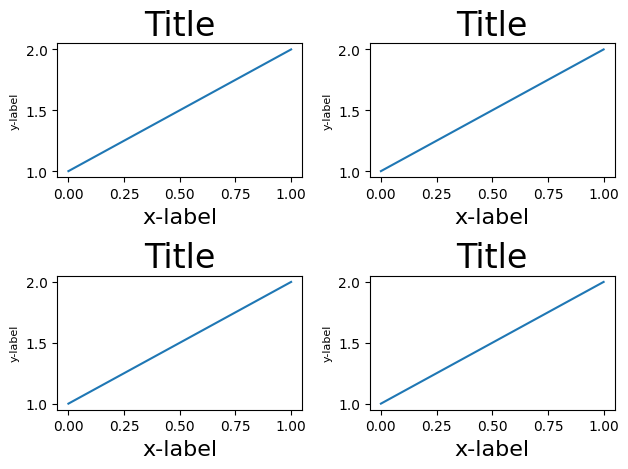

In [75]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

# Tight layout enabled.
fig.tight_layout()

plt.show()

## Plots speichern

Mit `matplotlib.pyplot.savefig` könnt ihr einen Plot als Bilddatei speichern:

In [76]:
plt.savefig('plots/my_plot.png')

<Figure size 640x480 with 0 Axes>

> **Hinweis:** Um einen Plot im **DIN A4-Format** zu speichern könnt ihr dessen Größe und Auflösung anpassen:
>
> ```python
> fig = plt.gcf()
> fig.set_size_inches(11.69, 8.27)
> plt.savefig(filename, dpi=150)
> ```

> **Hinweis:** Um Plots in **LaTeX Dokumente** einzubinden bietet sich das [PGF Vektorformat](https://en.wikipedia.org/wiki/PGF/TikZ) statt Pixelgrafiken wie PNG an. Damit übernimmt LaTeX das Zeichnen des Plots und setzt zudem die enthaltenen Texte selbst, sodass die Fonts und Stile des Dokuments auch im Plot verwendet werden.
>
> Eine Beispiel-Implementierung findet ihr im [TexFig](https://github.com/knly/texfig) Repository.

# Seaborn
Seaborn ist wie Matplotlib eine Bibliothek zum Darstellen von Daten und erweitert dabei Matplotlib. Beispiel sind hierfür Violinen Diagramme sowie weitere [Diagramme](https://seaborn.pydata.org/examples/index.html).

<Axes: xlabel='Tag', ylabel='Betrag'>

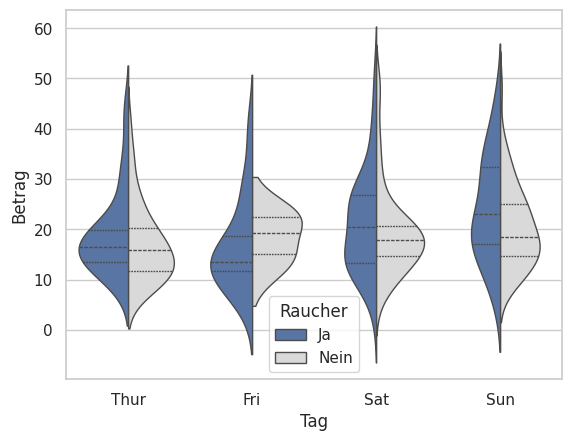

In [77]:
import seaborn as sns
sns.set_theme(style="whitegrid")

tips = sns.load_dataset("tips")
tips = tips.rename(columns={"day": "Tag", "total_bill": "Betrag", "smoker": "Raucher"})
tips["Raucher"] = tips["Raucher"].map(lambda s: "Ja" if s == "Yes" else "Nein")

sns.violinplot(data=tips, x="Tag", y="Betrag", hue="Raucher",
               split=True, inner="quart", linewidth=1,
               palette={"Ja": "b", "Nein": ".85"})

## Weitere Literaturhinweise
Matplotlib-Kapitel aus dem "Python Data Science Handbook" von Jake VanderPlas https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html

[Matplotlib-Tutorial aus Scipy 2018](https://youtu.be/6gdNUDs6QPc)

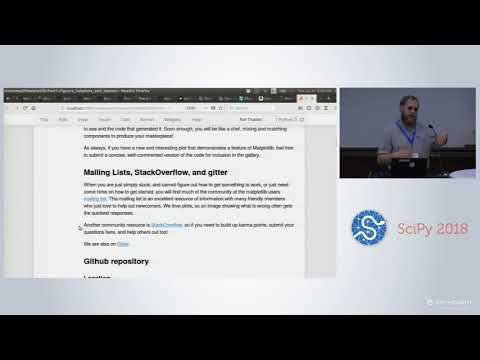

In [78]:
from IPython.display import YouTubeVideo
YouTubeVideo("6gdNUDs6QPc")

Nun kannst du Daten mit Numpy analysieren und mit Matplotlib plotten. Lerne in der nächsten Lektion wie du mit dem Modul _Pandas_ größere Datenmengen genauer analysieren kannst.

Hier ist das Übungsblatt zu diesem Notebook: [**05 - Übungsaufgaben Erste Visualisierungen in Matplotlib**](05_uebungsaufgaben_erste_visualisierungen_in_matplotlib.ipynb)

---

Wahlpflichtach Künstliche Intelligenz I: Praktikum 